In [18]:
from mlp import MLP
# lets try to implement basic learning
net = MLP(3, [4, 4, 1])

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [-0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]
ypreds = [net(x) for x in xs]
ypreds

[Value(data=0.812251756430804),
 Value(data=0.04971134920023222),
 Value(data=0.8436567028768429),
 Value(data=0.6776251898099261)]

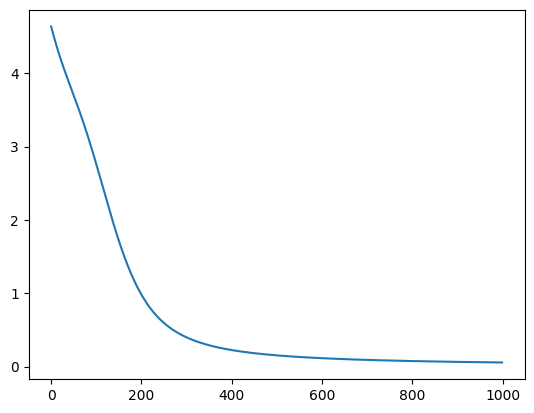

In [ ]:
import matplotlib.pyplot as plt

losses = []
learning_rate = 0.001

n = 1000
for i in range(n):
    # forward pass
    ypreds = [net(x) for x in xs]
    loss_val = sum((yreal - ypred)**2 for yreal, ypred in zip(ys, ypreds))

    # we need to zero gradient before calculating gradient again because it just accumulates forever
    for p in net.parameters():
        p.grad = 0
    # backward pass
    loss_val.backward()

    # step
    for p in net.parameters():
        p.data -= learning_rate * p.grad
    losses.append(loss_val.data)

plt.plot(range(n), losses)